In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn import tree

In [ ]:
%cd /content/drive/MyDrive/ml

/content/drive/MyDrive/ml


In [ ]:
%ls

 2147227_Knn_naive_kmean.ipynb   Folds5x2_pp.ods         Readme.txt~
'23_July_22_lab2 (1).ipynb'     'Lab (2).ipynb'          reg.csv
 23_July_22_lab2.ipynb           processed_min_max.csv   supermarket.csv
 CCPP/                           processed_scaler.csv
 Folds5x2_pp.csv                 Readme.txt


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('supermarket.csv', encoding="utf-8")

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
from sklearn.preprocessing import *
le = LabelEncoder()

In [ ]:
#convert catagorical data  to numerical data

def catNum(ds, col):
  le = LabelEncoder()
  lb = le.fit_transform(ds[col])
  ds.drop([col], axis=1, inplace=True)
  ds[col] = lb

In [ ]:
def preProcess(ds):
  catNum(ds,'Invoice ID')
  catNum(ds,'Branch')
  catNum(ds,'City')
  catNum(ds,'Gender')
  catNum(ds,'Product line')
  catNum(ds,'Payment')
  catNum(ds,'Customer type')
  #print(ds.head)
  ds.drop('Date',axis=1, inplace=True)
  ds.drop('Time',axis=1, inplace=True)
  ds.drop(['gross margin percentage'], axis=1, inplace=True)
  scaler = StandardScaler()
  trans_formed_min_max = pd.DataFrame(scaler.fit_transform(ds), columns=ds.columns)
  #print("\nNormalised Dataset:\n"+str(trans_formed_min_max.head()))
  return ds

In [ ]:
def decision(ds, y_val):

  y = ds[y_val].values
  ds.drop(y_val, axis=1, inplace=True)
  #print(ds.head())
  x = ds.iloc[:].values


  # Splitting the dataset into training and test set.  
 
  x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0) 
  classifier = DecisionTreeClassifier(criterion='entropy', random_state=0) 
  classifier.fit(x_train, y_train)
  # pre-pruning
  param_grid = {
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
  }
  grid_cv = GridSearchCV(classifier, param_grid, scoring="roc_auc", n_jobs=-1, cv=3).fit(x_train, y_train) 
  y_pred = classifier.predict(x_test)
  print("\nAccuracy score:\t"+str(accuracy_score(y_test,y_pred)*100))
  print('Model accuracy score with criterion entropy index: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
  print("\n\n")
  plt.figure(figsize=(12,8))

  f = plt.figure()
  f.set_figwidth(100)
  f.set_figheight(100)
  tree.plot_tree(classifier.fit(x_train, y_train)) 


In [ ]:
df = pd.read_csv('supermarket.csv', encoding="utf-8")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
preProcess(df.copy())

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating,Invoice ID,Branch,City,Gender,Product line,Payment,Customer type
0,74.69,7,26.1415,548.9715,522.83,26.1415,9.1,814,0,2,0,3,2,0
1,15.28,5,3.8200,80.2200,76.40,3.8200,9.6,142,2,1,0,0,0,1
2,46.33,7,16.2155,340.5255,324.31,16.2155,7.4,653,0,2,1,4,1,1
3,58.22,8,23.2880,489.0480,465.76,23.2880,8.4,18,0,2,1,3,2,0
4,86.31,7,30.2085,634.3785,604.17,30.2085,5.3,339,0,2,1,5,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,40.35,1,2.0175,42.3675,40.35,2.0175,6.2,153,2,1,1,3,2,1
996,97.38,10,48.6900,1022.4900,973.80,48.6900,4.4,250,1,0,0,4,2,1
997,31.84,1,1.5920,33.4320,31.84,1.5920,7.7,767,0,2,1,2,0,0
998,65.82,1,3.2910,69.1110,65.82,3.2910,4.1,308,0,2,1,4,0,1



Accuracy score:	54.800000000000004
Model accuracy score with criterion entropy index: 0.5480





<Figure size 864x576 with 0 Axes>

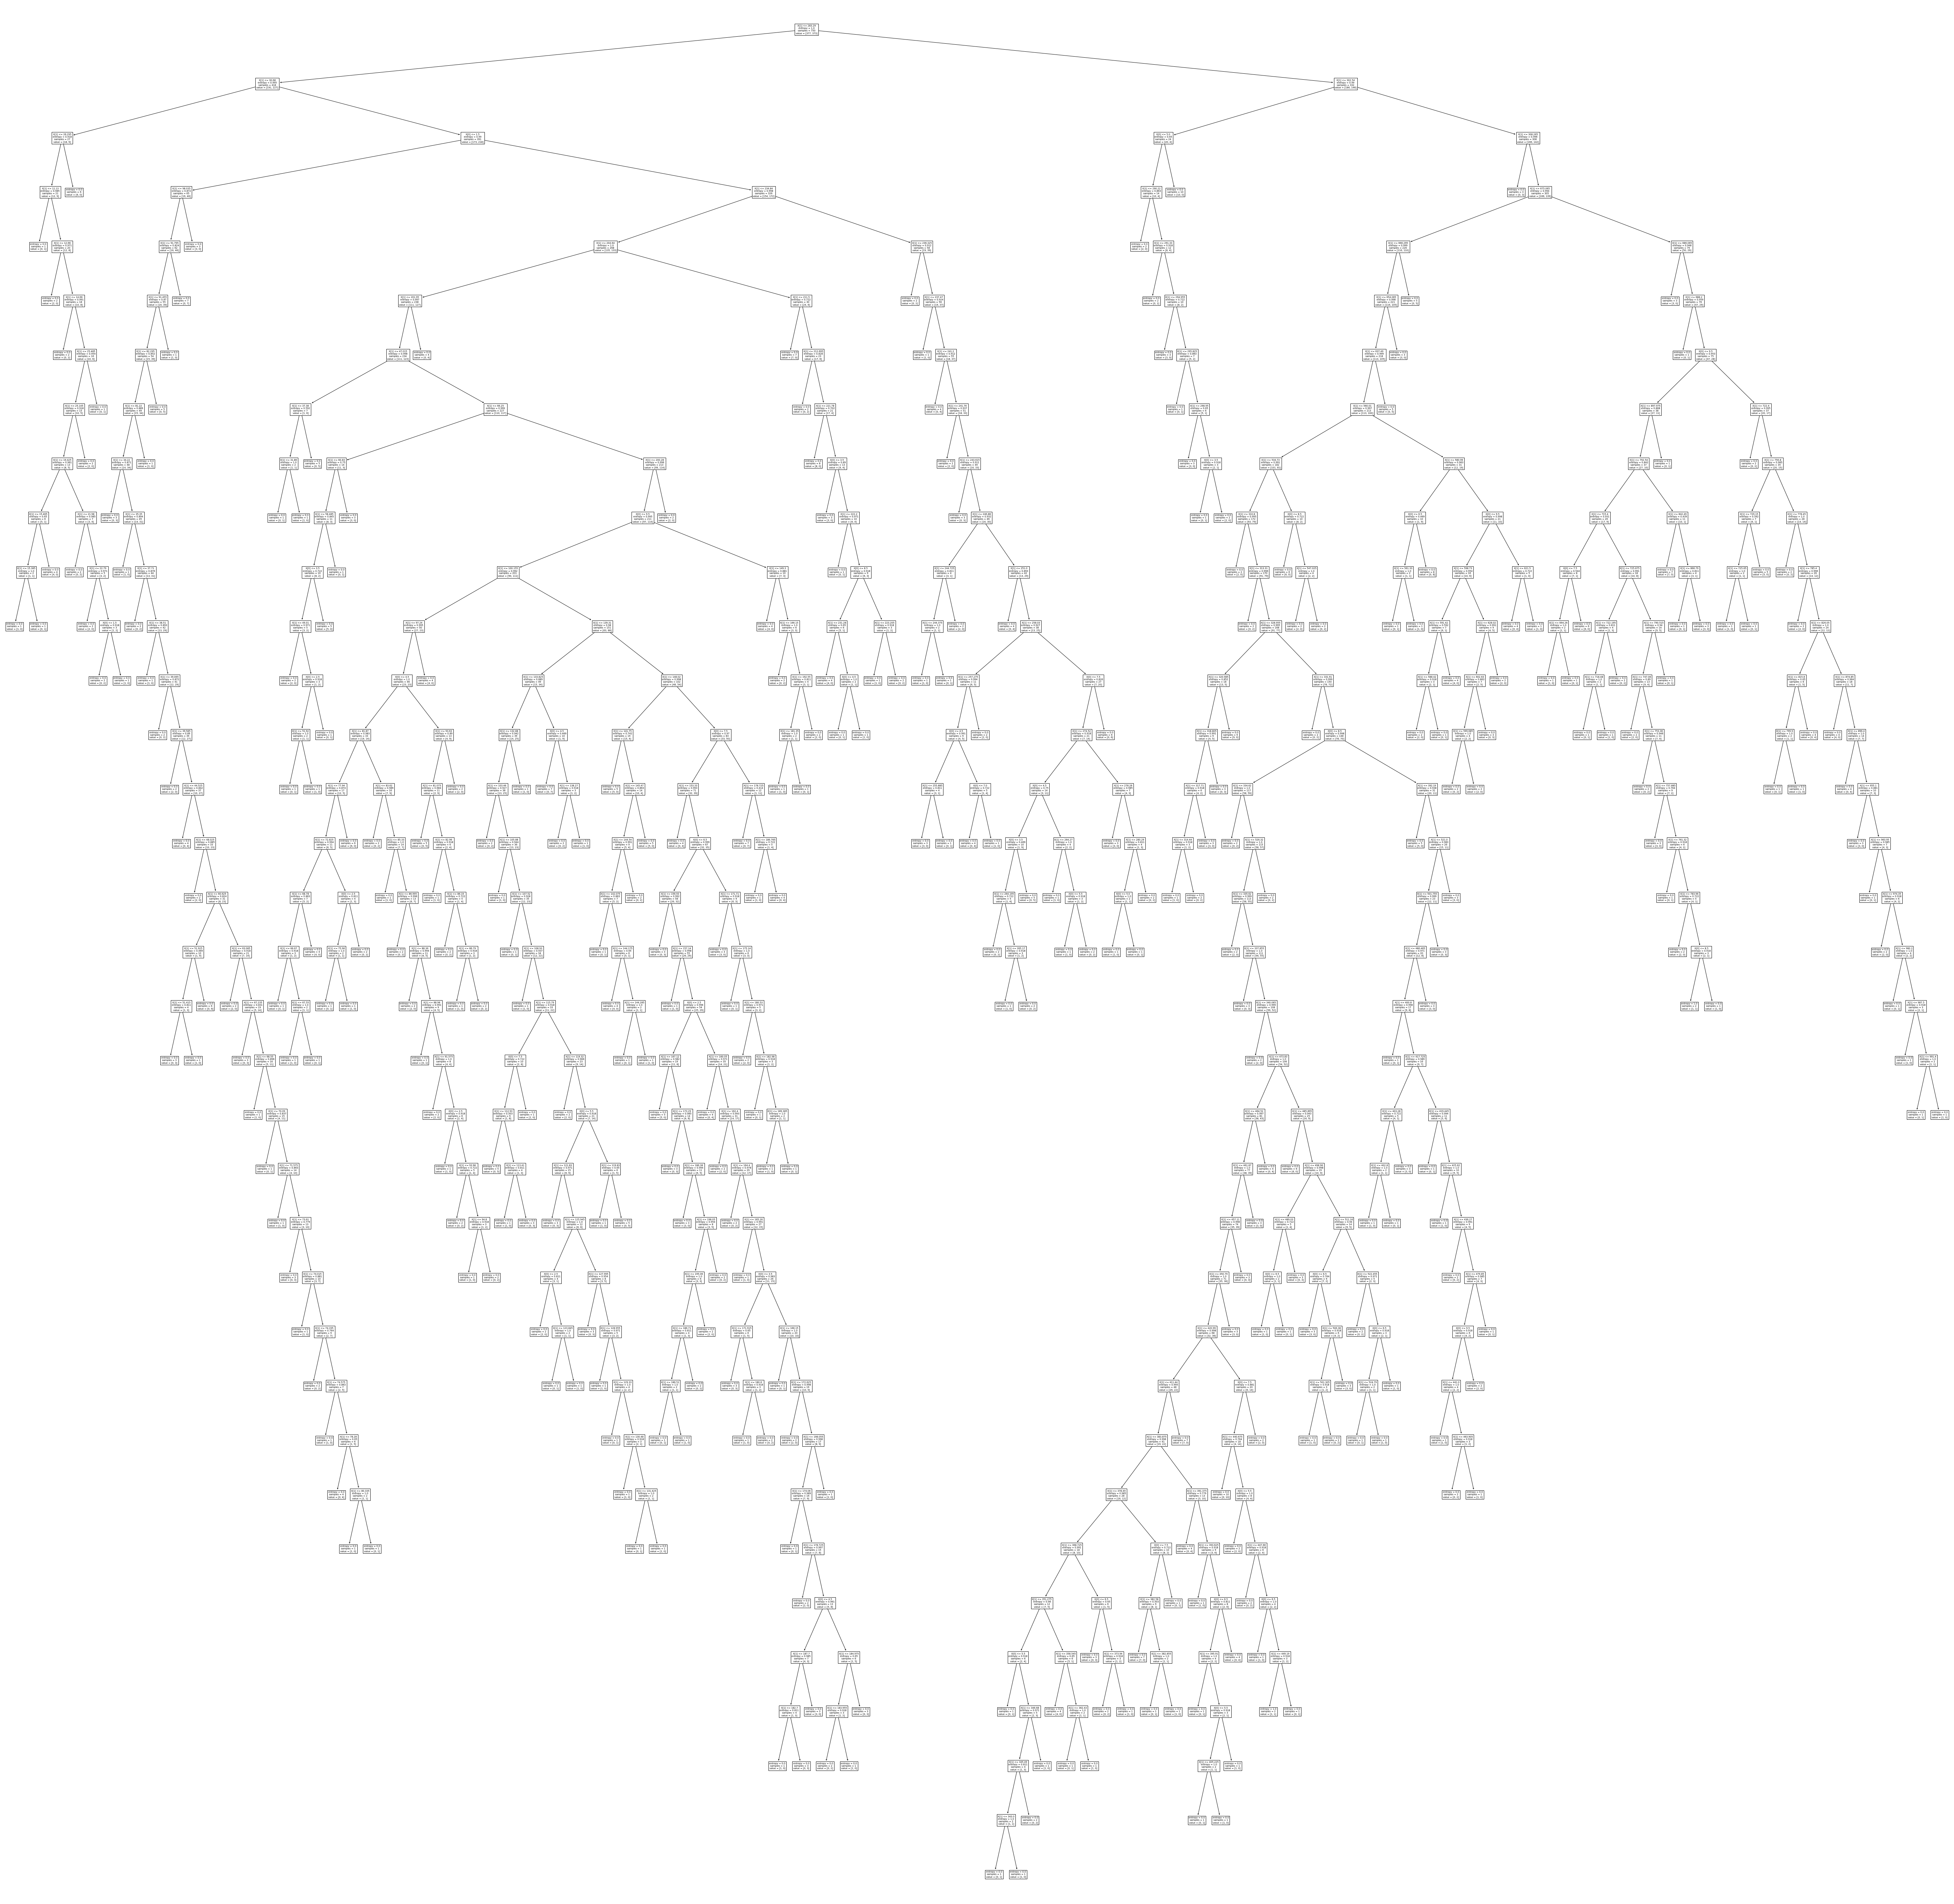

In [ ]:
decision(preProcess(df.copy()), 'Gender')


Accuracy score:	48.0
Model accuracy score with criterion entropy index: 0.4800





<Figure size 864x576 with 0 Axes>

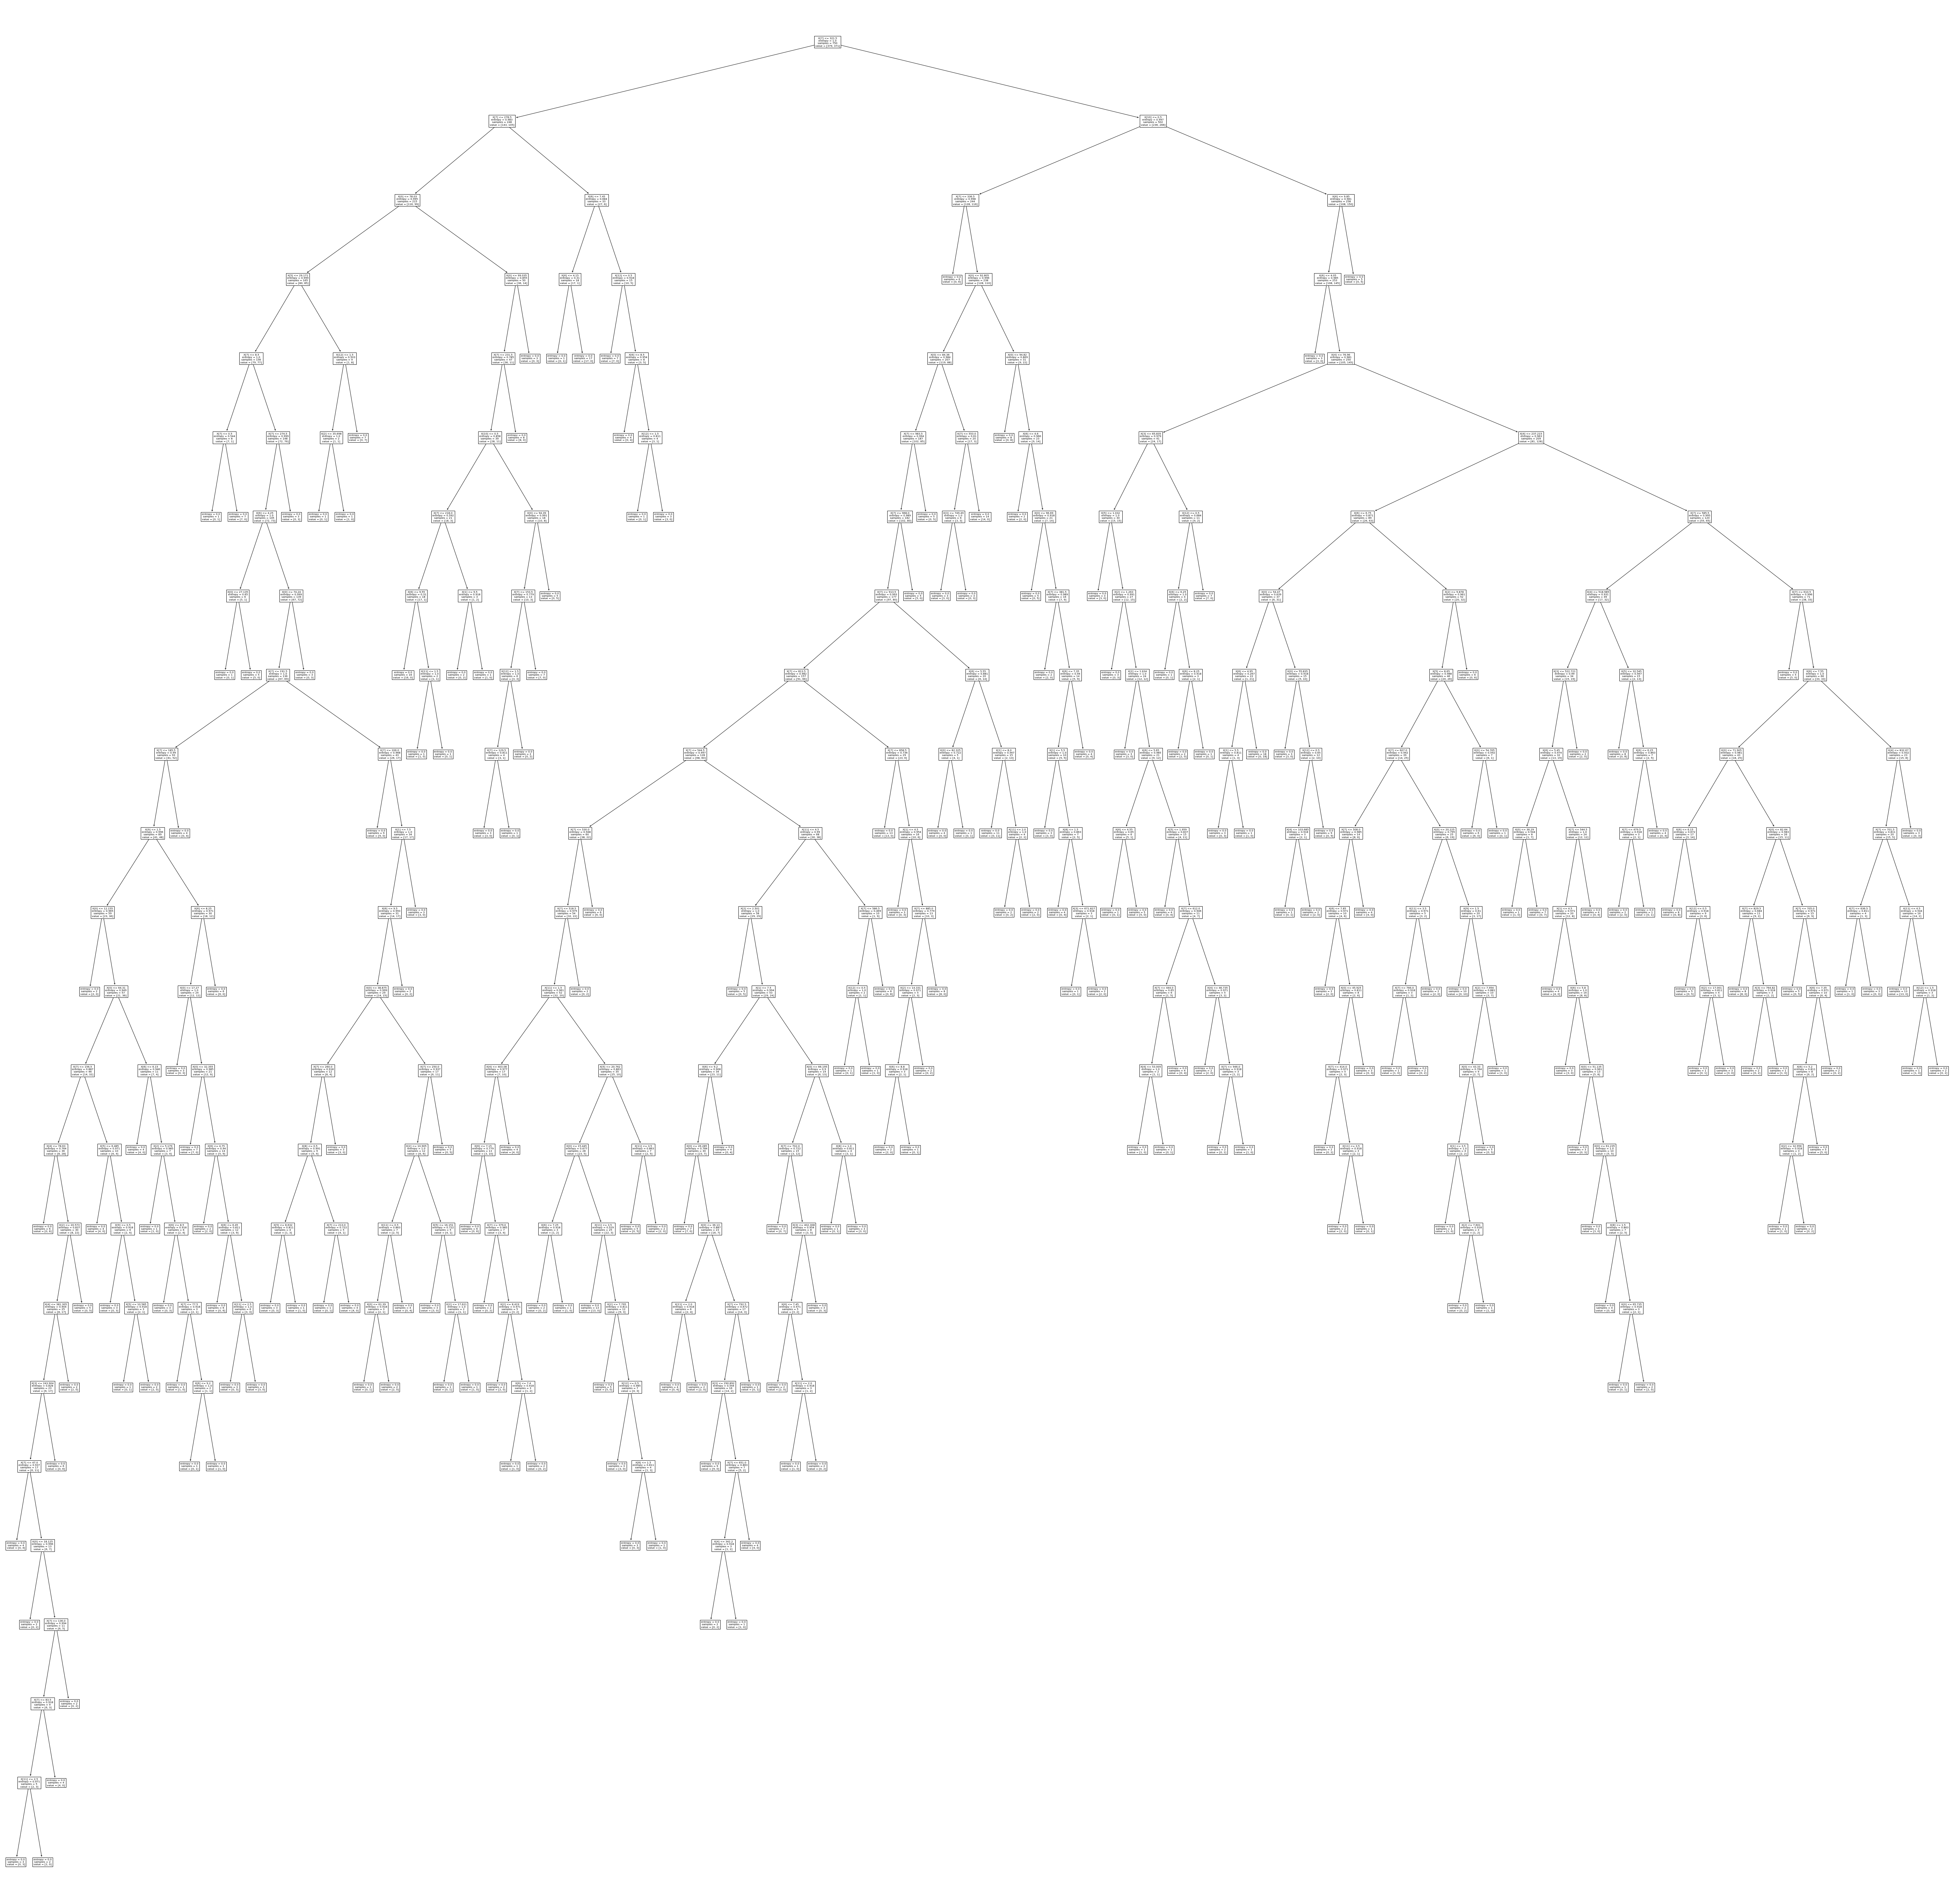

In [ ]:
decision(preProcess(df.copy()), 'Customer type')

In [ ]:
decision(preProcess(df.copy()), 'Quantity')


In [ ]:
df = pd.read_csv('reg.csv', encoding="utf-8")

In [ ]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [ ]:
from sklearn.metrics import r2_score
from sklearn import model_selection
from sklearn import linear_model

def lin(ds, y_val):
  y = ds[y_val].values
  ds.drop(y_val, axis=1, inplace=True)
  #print(ds.head())
  x = ds.iloc[:].values


  # Splitting the dataset into training and test set.  
 
  x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0) 
  classifier = LinearRegression()
  classifier.fit(x_train, y_train)
  y_pred = classifier.predict(x_test)
  print(y_pred)
  score = mean_squared_error(y_test, y_pred)
  print("\n Mean Squared error:\t"+str(score))
  sns.lmplot(x='RH',y='PE',data=df,aspect=2,height=6)
  print("\n\n")
  ds.plot.scatter(x = 'AT', y = 'PE', s = 1, c='green');
  print("\n\n")
  corr = ds.corr()
  sns.heatmap(corr, cmap = 'Wistia', annot= True);
  lm=linear_model.LinearRegression()
  model=lm.fit(x_train,y_train)
  pred=lm.predict(x_train)
  print(pred)
  print(model.coef_)
  print(model.intercept_)
  y_pred = lm.predict(x_test)
  score = mean_squared_error(y_test,y_pred)
  print(score)
  print(r2_score(pred,y_train))
  predd = lm.predict(x_test)
  print(r2_score(predd,y_test))
  #print("\nAccuracy score:\t"+str(accuracy_score(x_test,y_test)*100))

[69.42840455 53.12830849 51.96908514 ... 42.06936609 41.33498564
 63.49589119]

 Mean Squared error:	37.33487054761878






[47.32344468 68.90498626 52.49994471 ... 51.44804726 48.93305719
 69.3166825 ]
[ 0.729788    0.17532246  0.11125979 -0.41543592]
42.97785919016527
37.33487054761878
0.704092463762724
0.7051895503285368


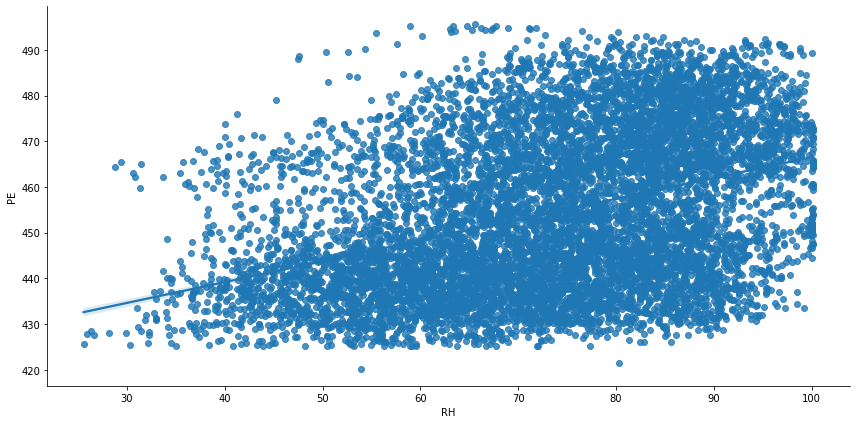

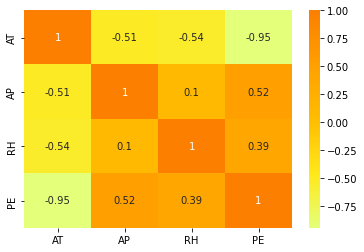

In [ ]:
#model.fit(x, y)
lin(df.copy(), 'V')

In [ ]:
df_encode = df
# X = df_encode.drop('PE',axis=1) # Independet variable
X = df_encode['AT'].values # Independet variable
y = df_encode['PE'].values # dependent variable

X = X.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [ ]:
lm=linear_model.LinearRegression()
model=lm.fit(X_train,y_train)
pred=lm.predict(X_train)
print(pred)
print(model.coef_)
print(model.intercept_)
#checking accuracy:
from sklearn.metrics import r2_score
print(r2_score(pred,y_train))
predd = lm.predict(X_test)
print(r2_score(predd,y_test))

[452.32804974 468.44412264 429.63974253 ... 444.43269235 441.46108806
 452.4148119 ]
[-2.16905423]
496.96718571318087
0.8854247982024653
0.891751499486316


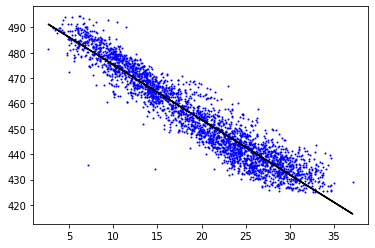

In [ ]:
y_pred = lm.predict(X_test)
plt.scatter(X_test, y_test, color ='b',s=1)
plt.plot(X_test, y_pred, color ='k')
  
plt.show()